<a href="https://colab.research.google.com/github/sachin2000k/CodeDown-Projects/blob/master/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep CNN consists many neural network layers.
- There are two types of layers: convolutional and pooling.
- Depth of each filter increases from left to right
- Last stage is typically made of one or more fully connected layers.

# Main concepts in cnvnets
- Local Receptive Fields
- Shared weights
- Pooling


# Local Receptive Fields
- for preserving spatial information of image it is represented with a matrix of pixels
- To encode the local structure  is to create submatrix of adjacent input neurons into single hidden neuron belonging to next layer.
- That single hidden neuron represents one local receptive field and the operation is called convolution. 

In [0]:
# convolutionsal layer with 32 parallel features and a filter size of 3X3
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))

we are applying a 3X3 convolution on 28X28 images with one input channel resulting in 32 output channels

In [0]:
#Pooling layer
#model.add(layers.MaxPool2D(2,2))


#HERE WE WILL APPLY DEEP CNNs TO MNIST DATASET AND TRY TO ACHIEVE BETTER ACCURACY

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
EPOCHS = 5
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT = 0.95
IMG_ROWS, IMG_COLS = 28,28 # Input dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
NB_CLASSES = 10


In [0]:

def build(input_shape, classes):
  model = models.Sequential()
  #conv->relu->pool
  model.add(layers.Convolution2D(20,(5,5),activation='relu', input_shape = input_shape))
  model.add(layers.MaxPooling2D(pool_size=(2,2), strides =(2,2)))
  #conv->relu->pool
  model.add(layers.Convolution2D(50, (5,5), activation = 'relu'))
  model.add(layers.MaxPooling2D(pool_size = (2,2), strides=(2,2)))
  #flatten -> relu layers
  model.add(layers.Flatten())
  model.add(layers.Dense(500, activation='relu'))
  #softmax classifier
  model.add(layers.Dense(classes, activation='softmax'))
  return model

In [6]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
# reshape
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28,28,1))
X_train, X_test = X_train/255.0, X_test/255.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [8]:
model = build(input_shape = INPUT_SHAPE, classes = NB_CLASSES)
#Try changing the parameters of the compile function like optimizer = ADAM and so on
model.compile(loss = "categorical_crossentropy", optimizer=OPTIMIZER, metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 50)          25050     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               400500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

Callbacks is mainly used to store your progress and to draw a graph in Tensorboard

In [0]:
callbacks = [ tf.keras.callbacks.TensorBoard(log_dir='./content./logs')]

In [10]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, verbose=VERBOSE,
                    epochs = EPOCHS, validation_split = VALIDATION_SPLIT,
                    callbacks = callbacks)

Epoch 1/5
24/24 [==============================] - 15s 616ms/step - loss: 1.1851 - accuracy: 0.6400 - val_loss: 0.4820 - val_accuracy: 0.8499
Epoch 2/5
24/24 [==============================] - 15s 609ms/step - loss: 0.3594 - accuracy: 0.8960 - val_loss: 0.3281 - val_accuracy: 0.9035
Epoch 3/5
24/24 [==============================] - 15s 608ms/step - loss: 0.2354 - accuracy: 0.9343 - val_loss: 0.2377 - val_accuracy: 0.9258
Epoch 4/5
24/24 [==============================] - 15s 619ms/step - loss: 0.1633 - accuracy: 0.9557 - val_loss: 0.1792 - val_accuracy: 0.9444
Epoch 5/5
24/24 [==============================] - 15s 610ms/step - loss: 0.1143 - accuracy: 0.9697 - val_loss: 0.1528 - val_accuracy: 0.9527


In [11]:
score = model.evaluate(X_test, y_test, verbose = VERBOSE)
print('\nTest score:', score[0])
print('Test accuracy', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.1368 - accuracy: 0.9563

Test score: 0.13683053851127625
Test accuracy 0.9563000202178955


In [12]:
history2 = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=20,
                     verbose = VERBOSE, callbacks = callbacks,
                     validation_split = VALIDATION_SPLIT)

Epoch 1/20
24/24 [==============================] - 14s 596ms/step - loss: 0.0982 - accuracy: 0.9737 - val_loss: 0.1759 - val_accuracy: 0.9441
Epoch 2/20
24/24 [==============================] - 14s 595ms/step - loss: 0.0804 - accuracy: 0.9757 - val_loss: 0.1279 - val_accuracy: 0.9614
Epoch 3/20
24/24 [==============================] - 14s 582ms/step - loss: 0.0589 - accuracy: 0.9863 - val_loss: 0.1378 - val_accuracy: 0.9567
Epoch 4/20
24/24 [==============================] - 14s 599ms/step - loss: 0.0450 - accuracy: 0.9880 - val_loss: 0.1232 - val_accuracy: 0.9603
Epoch 5/20
24/24 [==============================] - 14s 599ms/step - loss: 0.0330 - accuracy: 0.9920 - val_loss: 0.1253 - val_accuracy: 0.9620
Epoch 6/20
24/24 [==============================] - 14s 604ms/step - loss: 0.0223 - accuracy: 0.9967 - val_loss: 0.1300 - val_accuracy: 0.9617
Epoch 7/20
24/24 [==============================] - 14s 602ms/step - loss: 0.0226 - accuracy: 0.9930 - val_loss: 0.1111 - val_accuracy: 0.9666

In [13]:
score = model.evaluate(X_test, y_test, verbose = VERBOSE)
print('\nTest score:', score[0])
print('Test accuracy', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.0988 - accuracy: 0.9726

Test score: 0.09879717975854874
Test accuracy 0.972599983215332


In [15]:
history2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

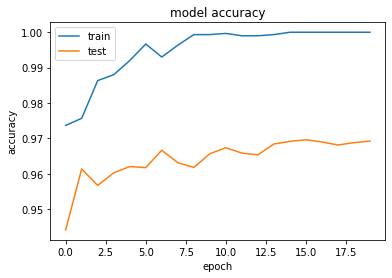

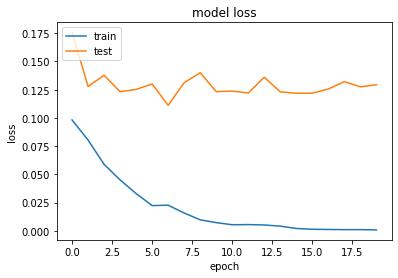

In [16]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()